# Double Slit Experiment- one photon at a time 

</strong> Author: Jonathan Hasan </strong>

</strong> Class: Modern Physics </strong> 

</strong> Date: 4/28/2022 </strong> 

Purpose: Investigate the Wave-particle duality of light. TeachSpin Apparatus uses a red laser and light with a green filter in order to create interference patterns with photons. 

If one recalls from interference lectures, light when it hits the slits ends up diffracting outwards from the slits and the photons end up interfering with each other. It creates interference patterns on a back drop. 

# Import libraries 

In [1]:
import numpy as np 

import matplotlib.pyplot as plt 

import pandas as pd

from astropy.modeling import models, fitting 

from scipy.odr import *

from math import pi 

%matplotlib notebook 

# Define functions to be used 

In [2]:
# functions for propagating uncertanties 

def multiply_uncertainties(a, del_a, b, del_b):
    q = a*b
    
    #del_q = q * ((del_a/a)+(del_b/b))
    del_q = q * np.sqrt(((del_a/a)**2+(del_b/b)**2))
    
    return q, del_q 

def divide_uncertainties(a, del_a, b, del_b): 
    q = a/b
    
    #del_q = q * ((del_a/a)+(del_b/b))
    del_q = q * np.sqrt(((del_a/a)**2+(del_b/b)**2))
    
    return q, del_q     

# Define variables and uncertanties

Uncertanties still need to be considered when analyzing the distance between slits. The uncertanties are defined below. 

In [3]:
# Define D

D = .5 # m 

#define wavelengths of red and green laser 

red_wavelength = 670/(1*10**9) #m

red_unc = 5/(1*10**9) #m

green_wavelength = 546/(1*10**9) #m

green_unc = 5/(1*10**9) #m

#Uncertainty in intensity and micrometer 

V_error = .005 # V

x_error = .05/1000 #m

# Red Laser Single Slit Wavelength Plot 

Here the data for the single slit with the red laser is shown 

In [4]:
single_slit_data = pd.read_csv("./Data/RedLaserSingleSlit.txt", sep=',')

single_slit_position_red = single_slit_data.iloc[:, 0]

single_slit_Intensity_red = single_slit_data.iloc[:, 1]



<IPython.core.display.Javascript object>


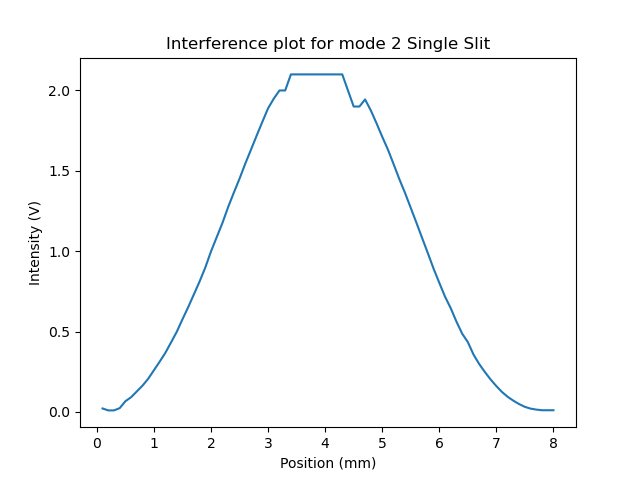

In [5]:
plt.figure()

plt.plot(single_slit_position_red, single_slit_Intensity_red)

plt.title("Interference plot for mode 2 Single Slit")

plt.xlabel("Position (mm)")

plt.ylabel("Intensity (V)")

plt.savefig("interferencePlotMode2SingleSlit.png")

Max intensity seems to be 2.1 V and there are not fringe patterns detected. There is no interference so the photons are acting like particles and would be expected to have more Intensity in the middle then on the sides. 

# Red Laser Double Slit Wavelength plot 

Here the data for the double slit with the red laser is shown 

In [6]:
num = (6/.1)

#x_array = np.linspace(2,8,int(num)) 
#x_array = np.array([0, 0.5, 1, 1.5, 2, 2.1,2.2, 2.3, 2.4, 2.5, 2.6, 2.7,2.8, 2.9, 3,3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,  4, 4.1, 4.18, 4.2, 4.3, 4.4, 4.5,4.6, 4.7,  5, 5.1, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])

#x_array = np.concatenate(np.array([[ .000000001, .5, 1, 1.5], x_array]))

#y_array = np.array([.069, .164, .682, .343, 1.03, 2.1, 3.1, 3.6, 3.4, 2.4, 1.3, .55, .464, 1.48, 3.3, 5.2, 6.5, 6.6, 5.4, 3.4, 1.4, .443, 1.008, 3.1, 5.6, 7.2, 7.5, 8.2, 7.2, 4.8, 2.4, .795,.550, 1.60, 3.7, 5.6, 6.7, 6.4, 4.9, 2.9, 1.1, .439, .677, 1.64, 2.8, 3.5, 3.6, 3, 2, .446, .287, .468, .784, 1.02, 1.06, .905, .659, .416, .241, .166, .146, .134, .109, .076])



In [7]:
Double_slit_data = pd.read_csv("./Data/RedLaserDoubleSlit.txt", sep=',')

Double_slit_position_red = Double_slit_data.iloc[:, 0]

Double_slit_position_red[0] = .0001

Double_slit_intensity_red = Double_slit_data.iloc[:, 1]

In [8]:

Double_slit_position_red


0      0.0001
1      0.5000
2      1.0000
3      1.5000
4      2.0000
       ...   
65     8.0000
66     8.5000
67     9.0000
68     9.5000
69    10.0000
Name: Position(mm), Length: 70, dtype: float64

<IPython.core.display.Javascript object>


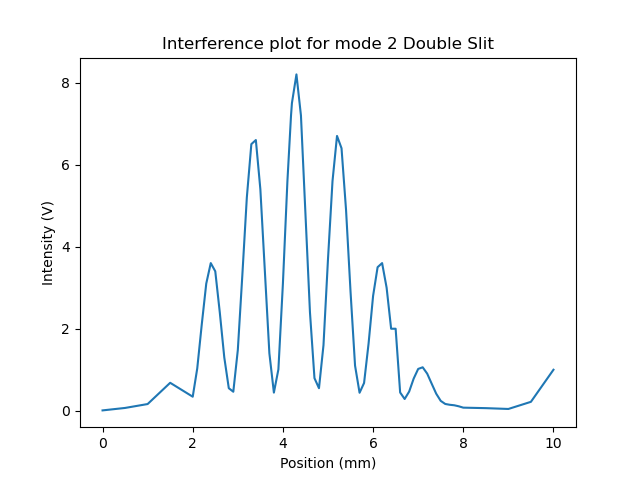

In [9]:
plt.figure()

plt.plot(Double_slit_position_red, Double_slit_intensity_red)

plt.title("Interference plot for mode 2 Double Slit")

plt.xlabel("Position (mm)")

plt.ylabel("Intensity (V)")

plt.savefig("interferencePlotMode2.png")

In [10]:
4.31-3.36

0.9499999999999997

Looks exactly as expected, peaks represent where waves constructively interfere and crests where the interference id destructive. This type of behavior can only come from waves. 

## Finding the distance of slits 

Recall that the $\theta$ is so small that $sin(\theta)$ is approximately $tan(\theta)$. This means that $tan(\theta)$ is equal to $\frac{y_{m}}{D}$. Thus it is possible to modify the constructive equation to the following

$d *\frac{y_{m}}{D} = m*\lambda$

Simply solve for d

In [11]:
# calculation for slit width

# arguments are fringe order, wavelength, wavelength, uncertainty, distance between fringes and Distance from slits to detector)

def d_calculation(m, wav, wav_unc, ym, D):
    
    term1, del_term1 = multiply_uncertainties(m, 0, wav, wav_unc)
    
    term2, del_term2 = multiply_uncertainties(term1, del_term1, D, 0)
    
    term3 = divide_uncertainties(term2, del_term2, ym, 0)
    
    return term3


slit_width, slit_width_unc = d_calculation(1, red_wavelength, red_unc, .00095, .50)

In [12]:
F"The Slit width was found to be {np.round(slit_width*1000,3)} +/- {np.round(slit_width_unc*1000,3)} mm"

'The Slit width was found to be 0.353 +/- 0.003 mm'

The slit width is line with what was found in the documentation for the teach spin apparatus. 

# Green Laser Single Slit Wavelength Plot 

In [13]:
single_slit_data_green = pd.read_csv("./Data/GreenBulbSingleSlit.txt", sep=',')

Single_slit_position_green = single_slit_data_green.iloc[:, 0]

Single_slit_Intensity_green = single_slit_data_green.iloc[:, 1]

<IPython.core.display.Javascript object>


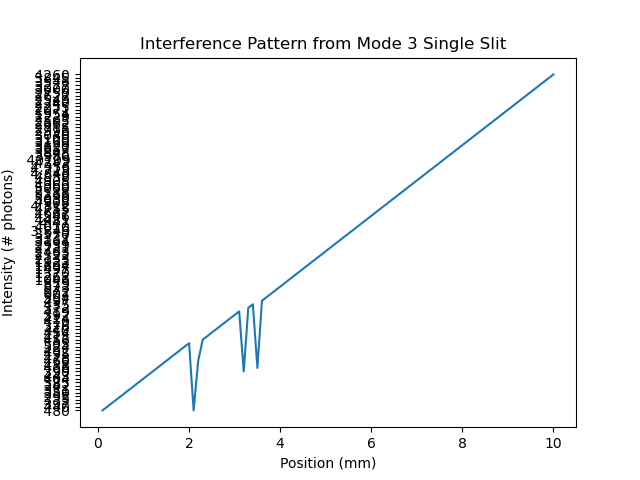

In [14]:
plt.figure()

plt.plot(Single_slit_position_green, Single_slit_Intensity_green)

plt.title("Interference Pattern from Mode 3 Single Slit  ")

plt.ylabel("Intensity (# photons)")

plt.xlabel("Position (mm)")

plt.savefig("TeamDataForMode3SingleSlit.png")

Of course, this graph looks nothing like a single slit interference pattern at all. 

# Green Laser Double Slit Wavelength Plot 

In [15]:
Double_slit_data_green = pd.read_csv("./Data/GreenBulbDoubleSlit.txt", sep=',')

Double_slit_position_green = Double_slit_data_green.iloc[:, 0]

Double_slit_intensity_green = Double_slit_data_green.iloc[:, 1]

In [16]:
Double_slit_intensity_green

0         9.10
1         3.60
2         1.50
3         1.08
4       870.00
        ...   
96     4422.00
97     4685.00
98     5022.00
99     5205.00
100    5700.00
Name:  Intensity(# photons), Length: 101, dtype: float64

<IPython.core.display.Javascript object>


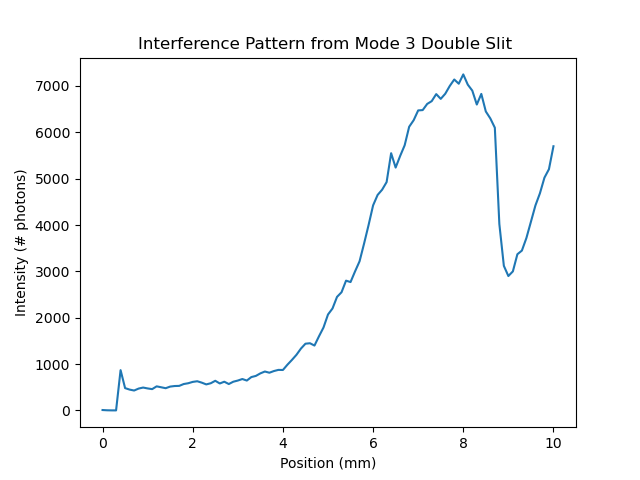

In [17]:
plt.figure()

plt.plot(Double_slit_position_green , Double_slit_intensity_green)

plt.title("Interference Pattern from Mode 3 Double Slit ")

plt.ylabel("Intensity (# photons)")

plt.xlabel("Position (mm)")

plt.savefig("TeamDataForMode3.png")

Odd behavior from this one. Looks like max is around 7.6 - 7.8 and then decreases back down from there. Very different behavior. 

# Data from Kip

Kip was kind enough to share his data with us. Using his data, got the following plot. 

In [18]:
data = pd.read_excel("./Data/KippData.xlsx", header = 1)

data = data.iloc[:, -2:]


In [19]:
data

,distance.1,sum/10.1
0,9.75,1703.0
1,9.70,1646.0
2,9.65,1624.0
3,9.60,1571.0
4,9.55,1518.0
...,...,...
191,0.20,156.7
192,0.15,162.1
193,0.10,182.4
194,0.50,177.3


In [20]:
Double_slit_position_green = data.iloc[:,0] 

Double_slit_intensity_green = data.iloc[:,1]

<IPython.core.display.Javascript object>


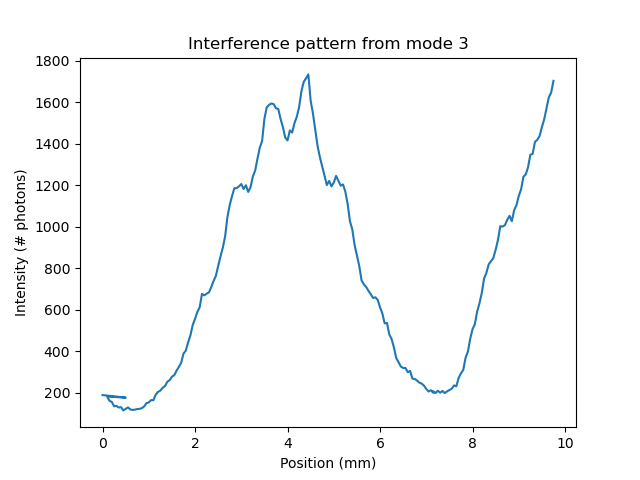

In [21]:
plt.figure()

plt.plot(Double_slit_position_green, Double_slit_intensity_green)

plt.title("Interference pattern from mode 3")

plt.ylabel("Intensity (# photons)")

plt.xlabel("Position (mm)")

plt.savefig("KipsData.png")

# Error Analysis 

It is necessary to compare the results to the theorized results from Franhauer.It is necessary to add uncertanties for X and Y variables 

<IPython.core.display.Javascript object>


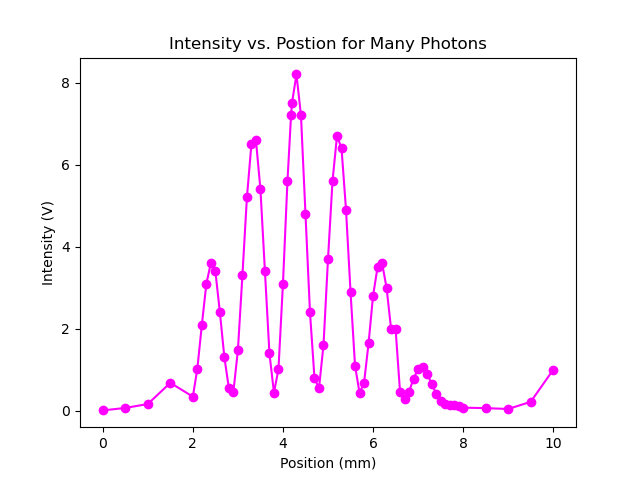

Text(0.5, 1.0, 'Intensity vs. Postion for Many Photons')

In [22]:
plt.figure()

plt.errorbar(Double_slit_position_red, Double_slit_intensity_red, x_error, V_error, '-o',color = 'magenta') # Plot the data 

plt.ylabel('Intensity (V)')
plt.xlabel('Position (mm)')

plt.title("Intensity vs. Postion for Many Photons")

# Define the models 

Need to use DoubleSlit Interference, uses "Fraunhofer Diffraction". 

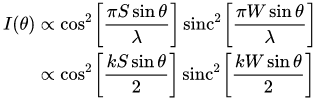

Source: Wikipedia

## Error analysis for red laser interference data 

In [23]:
# define at a function descriging double slitinterference

def double_slit(B, theta):
    #B is a vector fo the parameters
    # B[0]is thenormalization factor
    # B[1] isthe slit seperation divided by the wavelength of light 
    # theta is the angle from the optical path straight through the slits 
    
    return B[0]*np.cos(pi*B[1]*np.sin(theta))**2*np.sinc(pi*B[2]*np.sin(theta))**2

#now make the model to put into odr
double_slit_model = Model(double_slit)

In [24]:

#Need a table of x and y values and there uncertainties. Here the y values are the intensities and x values are the angles
#We have to calculate the angles using the measured distance between the double slit and the detector slit.
#This is about 0.5 meters and the slit measurement positions are in millimeters so
distance = 0.5 #m #distance between double and detector slits in meters
Intensities = Double_slit_intensity_red #set Intensities equal to the y data
x_max = 4.3 #from reading off the first plot, this is zero angle

#Converts the position of the detector slit in millimeters to the angle of diffraction.
#The position of measurements x and position of the central maximum, xmax, in millimeters
def theta_conversion(x,x_max,distance):
    theta=(x_max-x)/distance*1/1000.0 
    return theta

#angular positions of the intensitiy measuremenst
theta_data = theta_conversion(Double_slit_position_red,x_max,distance)

#Looks like there is a 0 point in the data which throws off everything

theta_data[theta_data == 0] = 0.0000000000000001

#The ODR "RealData" function will take in this order, x, y, sx, sy where sx and sy 
# are the standard deviations of the x and y measurements,i.e. their errors.
#If we had a column in or data, we could just use that, instead we will have to make one.

#since the errors are uniform for the intensitites measruements (the y values) need to make 
#an array the same length as the data and multiply by yerr
sy = V_error*np.ones(len(Double_slit_intensity_red)) 

#since the errors are uniform and on positition, take the relative position errors 
#times the theta, the angles, times the array of 1's the same
#length as the data

sx = abs(x_error/Double_slit_position_red)*abs(theta_data)*np.ones(len(Double_slit_position_red))


#Now make the data object to put into ODR
data = RealData(theta_data,Intensities,sx=sx,sy=sy)

Estimating the initial fit parameters

In [25]:
#Setup ODR
#Initial estimates of parameters
#The parameters are the maximum intensity, slit seperation divided by the wavelength of light, 
#and slit width divided by the wavelength of light
wavelength = 632.8e-9 #in meters
slit_separatition_guess = 0.353e-3 #in meters
slit_width_guess = 0.001e-3 #in meters
maximum_intensity_guess = 8.2 #in volts

initial = [maximum_intensity_guess,slit_separatition_guess/wavelength,slit_width_guess/wavelength]

In [26]:
odr = ODR(data,double_slit_model, beta0=initial)
#Run ODR
out = odr.run()
#Print Results
out.pprint()

Beta: [  8.31383888 521.78437394 -39.76869282]
Beta Std Error: [0.10193431 1.4743209  0.58701305]
Beta Covariance: [[ 3.30756315e-06  8.89658972e-09 -1.02646850e-05]
 [ 8.89658972e-09  6.91912914e-04  4.30227551e-06]
 [-1.02646850e-05  4.30227551e-06  1.09688957e-04]]
Residual Variance: 3141.467781067286
Inverse Condition #: 0.007224524201903151
Reason(s) for Halting:
  Sum of squares convergence


In [27]:
#Fit values
I_0 = out.beta[0]
S_fit = out.beta[1]*wavelength
W_fit = out.beta[2]*wavelength

#Fit errors
I_0_err = out.sd_beta[0]
S_fit_err = out.sd_beta[1]/out.beta[1]*S_fit
W_fit_err = out.sd_beta[2]/out.beta[2]*W_fit

#Error of the parameters
print("Fit Intensity: %.2f +/- %.2f Volts" %(I_0, I_0_err))
print("Separation: %.3f +/- %.3f mm" %(S_fit*1000, S_fit_err*1000))
print("Width  %.1f +/- %.1f microns" % (W_fit*10**6, W_fit_err*10**6)) 

Fit Intensity: 8.31 +/- 0.10 Volts
Separation: 0.330 +/- 0.001 mm
Width  -25.2 +/- 0.4 microns


<IPython.core.display.Javascript object>


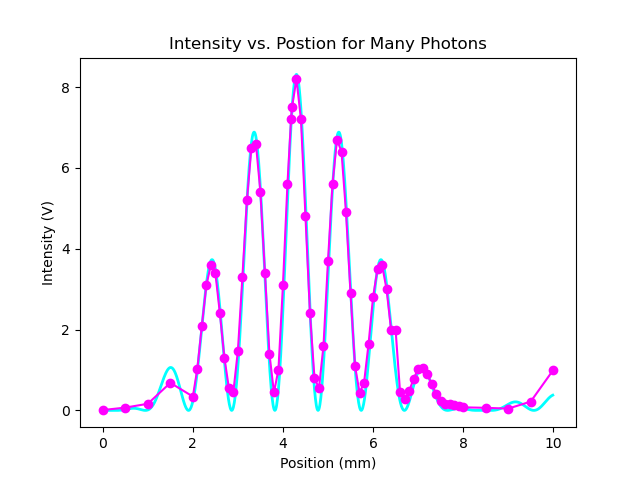

In [28]:

# Define the data
# For the x data, we want a smooth variation from the min and maximum values of the measrued data
x_fit = np.arange(min(Double_slit_position_red),max(Double_slit_position_red),0.01) #this will make potision from the max to min in steps of 0.01

# To get the y values, we put our x values, convert them to angles, and then put them and the output fit parameters B into our
# function for the double slit
y_fit = double_slit(out.beta,theta_conversion(x_fit,x_max,distance))

plt.figure() #need to make a 2nd figure otherwise, our plots will be put into figure 2
#plot the fit equations
plt.plot(x_fit,y_fit,'-',color='cyan',linewidth=2) #we don't need errorbars so we can just use "plot"
#plot the measured data for comparison
plt.errorbar(Double_slit_position_red,Double_slit_intensity_red,x_error,V_error,'o-',color='magenta')
plt.ylabel('Intensity (V)')
plt.xlabel('Position (mm)')
plt.title("Intensity vs. Postion for Many Photons")

plt.savefig("IntensityComparison.png")

<IPython.core.display.Javascript object>


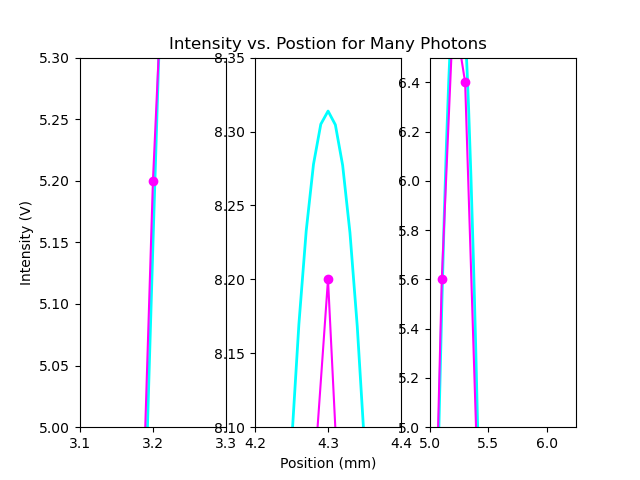

In [29]:
#plt.figure(3,figsize=(12,6)) #need to make a 2nd figure otherwise, our plots will be put into figure 2

plt.figure()
ax1=plt.subplot(1,3,1)
ax1.plot(x_fit,y_fit,'-',color='cyan',linewidth=2) #we don't need errorbars so we can just use "plot"
ax1.errorbar(Double_slit_position_red,Double_slit_intensity_red,x_error,V_error,'o-',color='magenta')
plt.xlim(3.1,3.3)
plt.ylim(5.0,5.3)
plt.ylabel('Intensity (V)')

ax2=plt.subplot(1,3,2)
ax2.plot(x_fit,y_fit,'-',color='cyan',linewidth=2) #we don't need errorbars so we can just use "plot"
ax2.errorbar(Double_slit_position_red,Double_slit_intensity_red,x_error,V_error,'o-',color='magenta')
plt.xlim(4.2,4.4)
plt.ylim(8.1,8.35)
plt.xlabel('Position (mm)')
plt.title("Intensity vs. Postion for Many Photons")

ax3=plt.subplot(1,3,3)
ax3.plot(x_fit,y_fit,'-',color='cyan',linewidth=2) #we don't need errorbars so we can just use "plot"
ax3.errorbar(Double_slit_position_red,Double_slit_intensity_red,x_error,V_error,'o-',color='magenta')
plt.xlim(5,6.25)
plt.ylim(5,6.5)

plt.savefig("InDepthComparisonRedLaserDoubleSlit.png")

# Standard deviations

It is necessary to see how much the values from the true data deviate from the theoretical data. If one looks at the middle plot, one can see that the deviations seem to be amplified at the inflection points on the graph. 

In [30]:
x_theoretical_max = 8.31

x_max = 8.20 

z_score = abs(x_theoretical_max - x_max)/np.std(Double_slit_position_red)

F" The theoretical max is only {np.round(z_score,2)} deviations away from the mean"

' The theoretical max is only 0.05 deviations away from the mean'

The theoretical minimum is only 0.05 standard deviations away from the mean. That means I would expect to see this value quite often. This is evidence that wave-particle duality was witnessed in the experiment. 

## Error analysis on green light data 

In [31]:
# define at a function descriging double slitinterference. Need to convert Volts to num photons



def double_slit(B, theta):
    #B is a vector fo the parameters
    # B[0]is the normalization factor
    # B[1] isthe slit seperation divided by the wavelength of light 
    # theta is the angle from the optical path straight through the slits 
    return (B[0]*np.cos(pi*B[1]*np.sin(theta))**2*np.sinc(pi*B[2]*np.sin(theta))**2)

#now make the model to put into odr
double_slit_model = Model(double_slit)

In [32]:
#num photons to V

#num photons = E/h

# E is in joules 

# Joules to eV and then eV to Volts 

Double_slit_intensity_volts = ((Double_slit_intensity_green*(6.62*10**-34)) * (6.242*10**-18))/(1.602*10**-19)

Double_slit_intensity_volts.max()

4.4726852284644185e-29

Kipps Data will be used to analyze the fit of the model 

In [33]:

#Need a table of x and y values and there uncertainties. Here the y values are the intensities and x values are the angles
#We have to calculate the angles using the measured distance between the double slit and the detector slit.
#This is about 0.5 meters and the slit measurement positions are in millimeters so
distance = 0.5 #m #distance between double and detector slits in meters
Intensities = Double_slit_intensity_volts #set Intensities equal to the y data
x_max = 4.3 #from reading off the first plot, this is zero angle

#Converts the position of the detector slit in millimeters to the angle of diffraction.
#The position of measurements x and position of the central maximum, xmax, in millimeters
def theta_conversion(x,x_max,distance):
    theta=(x_max-x)/distance*1/1000.0 
    return theta

#angular positions of the intensitiy measuremenst
theta_data = theta_conversion(Double_slit_position_green,x_max,distance)

#Looks like there is a 0 point in the data which throws off everything

theta_data[theta_data == 0] = 0.0000000000000001

#The ODR "RealData" function will take in this order, x, y, sx, sy where sx and sy 
# are the standard deviations of the x and y measurements,i.e. their errors.
#If we had a column in or data, we could just use that, instead we will have to make one.

#since the errors are uniform for the intensitites measruements (the y values) need to make 
#an array the same length as the data and multiply by yerr

#yerr was causing problems since its no longer accurate regarding the mode 3 scenario 

#Chose smallest value and found 5% of that value and took that as uncertainty 

sy = (1.49*10**-31)*np.ones(len(Double_slit_intensity_volts))

#since the errors are uniform and on positition, take the relative position errors 
#times the theta, the angles, times the array of 1's the same
#length as the data

sx = abs(x_error/Double_slit_position_green)*abs(theta_data)*np.ones(len(Double_slit_position_green))


#Now make the data object to put into ODR, turns out the WD problems relate to the sx and sy variables, having 0 or inf
#causes problems use a mask 
data1 = RealData(theta_data,Intensities,sx=sx[sx < 1e308],sy=sy[sy < 1e308])

In [34]:
#Setup ODR
#Initial estimates of parameters
#The parameters are the maximum intensity, slit seperation divided by the wavelength of light, 
#and slit width divided by the wavelength of light
wavelength = 546e-9 #in meters
slit_separatition_guess = 0.353e-3 #in meters
slit_width_guess = 0.001e-3 #in meters
maximum_intensity_guess = 4.47e-29 #in Volts

initial = [maximum_intensity_guess,slit_separatition_guess/wavelength,slit_width_guess/wavelength]

In [35]:
odr = ODR(data1,double_slit_model, beta0=initial)
#Run ODR
out = odr.run()
#Print Results
out.pprint()

Beta: [3.14134622e-29 6.60671675e+02 1.08451977e+01]
Beta Std Error: [3.01914444e-30 3.89688969e+00 3.28121753e+00]
Beta Covariance: [[ 6.95138517e-64 -1.41514058e-35  5.08223465e-34]
 [-1.41514058e-35  1.15808330e-03 -2.12695299e-05]
 [ 5.08223465e-34 -2.12695299e-05  8.21057589e-04]]
Residual Variance: 13112.829899975623
Inverse Condition #: 0.0033776384636614717
Reason(s) for Halting:
  Sum of squares convergence


In [36]:
out.sd_beta[0]

3.01914443777009e-30

In [37]:
#Fit values
I_0 = out.beta[0]/(1*10**-24)
S_fit = out.beta[1]*wavelength
W_fit = out.beta[2]*wavelength

#Fit errors
I_0_err = out.sd_beta[0]/(1*10**-24)
S_fit_err = out.sd_beta[1]/out.beta[1]*S_fit
W_fit_err = out.sd_beta[2]/out.beta[2]*W_fit

#Error of the parameters
print("Fit Intensity: %.6f +/- %10f YoctoVolts" %(I_0, I_0_err))
print("Separation: %.3f +/- %.6f mm" %(S_fit*1000, S_fit_err*1000))
print("Width  %.1f +/- %.1f microns" % (W_fit*10**6, W_fit_err*10**6)) 

Fit Intensity: 0.000031 +/-   0.000003 YoctoVolts
Separation: 0.361 +/- 0.002128 mm
Width  5.9 +/- 1.8 microns


<IPython.core.display.Javascript object>


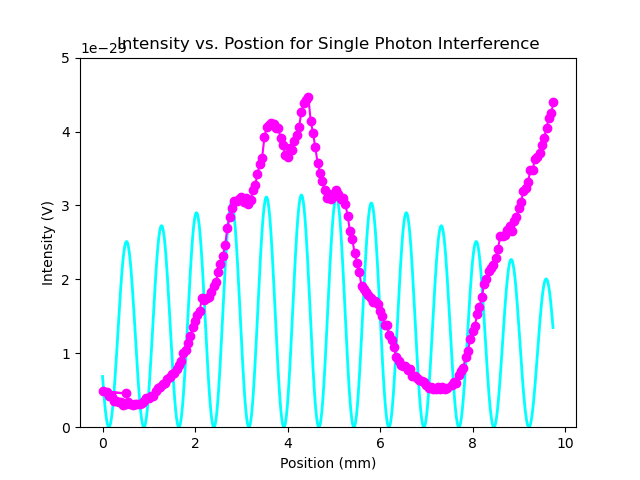

In [38]:

# Define the data
# For the x data, we want a smooth variation from the min and maximum values of the measrued data
x_fit = np.arange(min(Double_slit_position_green),max(Double_slit_position_green),0.01) #this will make potision from the max to min in steps of 0.01

# To get the y values, we put our x values, convert them to angles, and then put them and the output fit parameters B into our
# function for the double slit
y_fit = double_slit(out.beta,theta_conversion(x_fit,x_max,distance))

plt.figure() #need to make a 2nd figure otherwise, our plots will be put into figure 2
#plot the fit equations
plt.plot(x_fit,y_fit,'-',color='cyan',linewidth=2) #we don't need errorbars so we can just use "plot"
#plot the measured data for comparison
plt.errorbar(Double_slit_position_green, Double_slit_intensity_volts,0,0,'o-',color='magenta')
plt.ylabel('Intensity (V)')
plt.xlabel('Position (mm)')
plt.title("Intensity vs. Postion for Single Photon Interference")

plt.ylim(0, .5 * 10**-28)

plt.savefig("IntensityComparisonGreen.png")

There is no use investigating the errors here, one can tell from the graph that the model is extremely different from the experimental data. The experimental data is obviously suspect since the deconstructive interference isn't dropping down to 0. In fact, this looks closer to a single slit interference pattern then anything else.

There are some similarities though, the maximum for both graphs correspond to roughly the same position of 4.25. Other then that, they are unidentical. Will need to redo the experiment after finding out the issues with the apparatus. 